In [1]:
#loading the required packages
import numpy as np   
import pandas as pd    
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from scipy.stats import zscore
from sklearn.metrics import silhouette_samples, silhouette_score
import seaborn as sns
%matplotlib inline 
sns.set(color_codes=True)
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
bb=pd.read_csv('data2.csv')
bb=bb.dropna(axis=0)
bb.head()


,discount,overall rating,total rating,5star,4star,3star,2star,1star,reviews,review link,manufacturer info,importer info,packer info,text verified,target
0,1.62,5.0,6,6,0,0,0,0,2,1,0,0,0,0,1
1,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.22,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2.00,5.0,1,1,0,0,0,0,0,0,0,0,0,0,1
4,3.20,5.0,2,2,0,0,0,0,0,0,0,0,0,0,0


In [3]:
rows, column = bb.shape
print('The dataset contains', rows, 'rows and', column, 'columns.')

The dataset contains 197 rows and 15 columns.


In [4]:
print('The data type of each attribute: \n')
bb.info()


The data type of each attribute: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197 entries, 0 to 196
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   discount           197 non-null    float64
 1   overall rating     197 non-null    float64
 2   total rating       197 non-null    int64  
 3   5star              197 non-null    int64  
 4   4star              197 non-null    int64  
 5   3star              197 non-null    int64  
 6   2star              197 non-null    int64  
 7   1star              197 non-null    int64  
 8   reviews            197 non-null    int64  
 9   review link        197 non-null    int64  
 10  manufacturer info  197 non-null    int64  
 11  importer info      197 non-null    int64  
 12  packer info        197 non-null    int64  
 13  text verified      197 non-null    int64  
 14  target             197 non-null    int64  
dtypes: float64(2), int64(13)
memory usage: 

In [5]:
bb.describe().T


,count,mean,std,min,25%,50%,75%,max
discount,197.0,35.758071,24.879174,0.0,10.02,36.05,58.43,83.38
overall rating,197.0,2.628426,2.094820,0.0,0.00,3.80,4.40,5.00
total rating,197.0,598.720812,4734.802227,0.0,0.00,2.00,12.00,64768.00
5star,197.0,313.045685,2261.299212,0.0,0.00,1.00,7.00,30441.00
4star,197.0,135.741117,1174.702450,0.0,0.00,0.00,3.00,16192.00
3star,197.0,73.695431,656.292811,0.0,0.00,0.00,2.00,9068.00
2star,197.0,31.654822,282.313552,0.0,0.00,0.00,1.00,3886.00
1star,197.0,44.472081,378.859238,0.0,0.00,0.00,2.00,5181.00
reviews,197.0,10.883249,73.120264,0.0,0.00,0.00,2.00,905.00
review link,197.0,0.461929,0.499819,0.0,0.00,0.00,1.00,1.00


In [6]:
print('Duplicated rows: ', bb[bb.duplicated()].shape[0])


Duplicated rows:  14


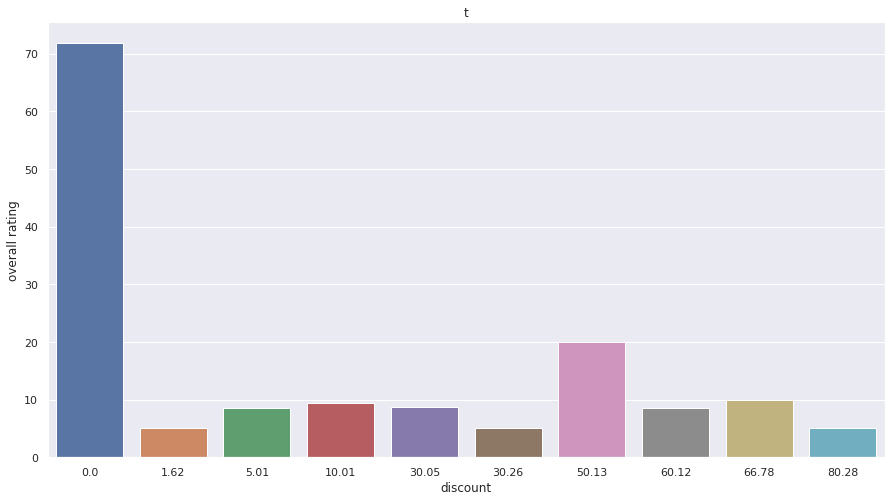

In [9]:
plt.figure(figsize=(15,8))
b1=bb.groupby('discount')['overall rating'].sum().sort_values(ascending = False ).head(10)
b1= b1.reset_index() 
b1.columns = ['discount' ,'overall rating']
sns.barplot(data= b1 , x= 'discount' , y ='overall rating');
plt.title("t");

In [10]:
#checking for correlation
plt.figure(figsize=(10,8))
corr=bb.drop(columns='Name').corr()
sns.heatmap(corr,annot=True);

KeyError: ignored

<Figure size 720x576 with 0 Axes>

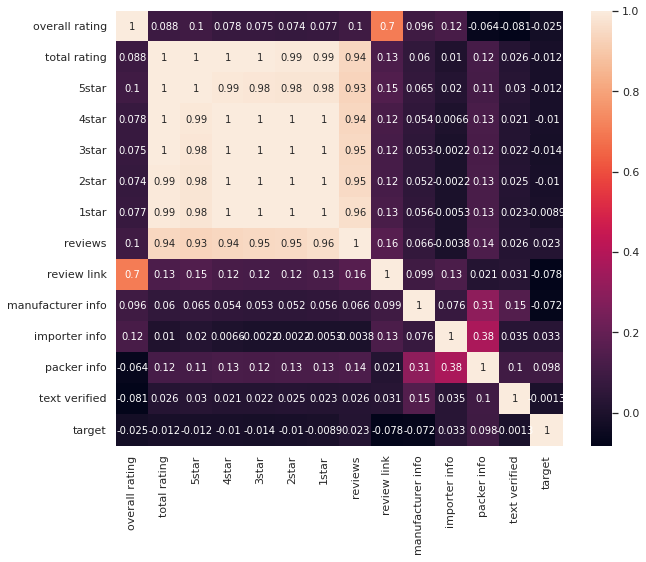

In [11]:
#checking for correlation
plt.figure(figsize=(10,8))
corr=bb.drop(columns='discount').corr()
sns.heatmap(corr,annot=True);

In [13]:
cc = bb.iloc[:,1:15] 
cc1 = cc.apply(zscore)
cc1.head()

,overall rating,total rating,5star,4star,3star,2star,1star,reviews,review link,manufacturer info,importer info,packer info,text verified,target
0,1.134998,-0.125503,-0.136129,-0.115848,-0.112577,-0.112412,-0.117683,-0.121798,1.079275,-1.95061,-0.31711,-0.701729,-3.253957,1.811797
1,-1.257924,-0.126773,-0.138789,-0.115848,-0.112577,-0.112412,-0.117683,-0.149220,-0.926548,-1.95061,-0.31711,-0.701729,-3.253957,-0.551938
2,-1.257924,-0.126773,-0.138789,-0.115848,-0.112577,-0.112412,-0.117683,-0.149220,-0.926548,-1.95061,-0.31711,-0.701729,-3.253957,-0.551938
3,1.134998,-0.126561,-0.138346,-0.115848,-0.112577,-0.112412,-0.117683,-0.149220,-0.926548,-1.95061,-0.31711,-0.701729,-3.253957,1.811797
4,1.134998,-0.126350,-0.137902,-0.115848,-0.112577,-0.112412,-0.117683,-0.149220,-0.926548,-1.95061,-0.31711,-0.701729,-3.253957,-0.551938


In [17]:
cc = bb.iloc[:,0:14] 
cc1 = cc.apply(zscore)
cc1.head()

,discount,overall rating,total rating,5star,4star,3star,2star,1star,reviews,review link,manufacturer info,importer info,packer info,text verified
0,-1.375650,1.134998,-0.125503,-0.136129,-0.115848,-0.112577,-0.112412,-0.117683,-0.121798,1.079275,-1.95061,-0.31711,-0.701729,-3.253957
1,-1.440931,-1.257924,-0.126773,-0.138789,-0.115848,-0.112577,-0.112412,-0.117683,-0.149220,-0.926548,-1.95061,-0.31711,-0.701729,-3.253957
2,-1.432066,-1.257924,-0.126773,-0.138789,-0.115848,-0.112577,-0.112412,-0.117683,-0.149220,-0.926548,-1.95061,-0.31711,-0.701729,-3.253957
3,-1.360338,1.134998,-0.126561,-0.138346,-0.115848,-0.112577,-0.112412,-0.117683,-0.149220,-0.926548,-1.95061,-0.31711,-0.701729,-3.253957
4,-1.311982,1.134998,-0.126350,-0.137902,-0.115848,-0.112577,-0.112412,-0.117683,-0.149220,-0.926548,-1.95061,-0.31711,-0.701729,-3.253957


In [22]:
#checking for the within sum of squares
wss =[] 
for i in range(1,14):
    KM = KMeans(n_clusters=i)
    KM.fit(cc1)
    wss.append(KM.inertia_)
wss

[2757.999999999999,
 1485.4127798192708,
 1178.0161787517718,
 974.6126194693665,
 793.7032101457046,
 684.4650580760483,
 600.8402373493338,
 521.0251218172092,
 452.7102350104957,
 432.0821839942479,
 365.6184039965865,
 331.6421461835922,
 304.4570762058242]

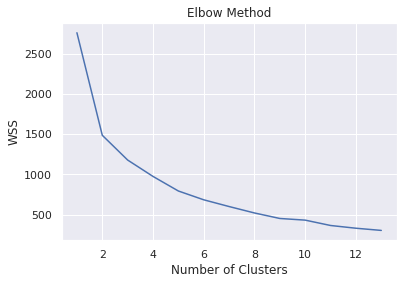

In [24]:
plt.plot(range(1,14), wss);
plt.title('Elbow Method');
plt.xlabel("Number of Clusters")
plt.ylabel("WSS");

In [25]:
#using 2 centroids
k_means = KMeans(n_clusters = 2)
k_means.fit(cc1)
labels = k_means.labels_

In [26]:

silhouette_score(cc1,labels)

0.8938856145813386

In [27]:
#plotting silhouette score for different centroids
kmeans_kwargs = {
   "init": "random",
   "n_init": 10,
   "max_iter": 300,
   "random_state": 42,
}


silhouette_coefficients = []

 # Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 14):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(cc1)
    score = silhouette_score(cc1,kmeans.labels_)
    silhouette_coefficients.append(score)

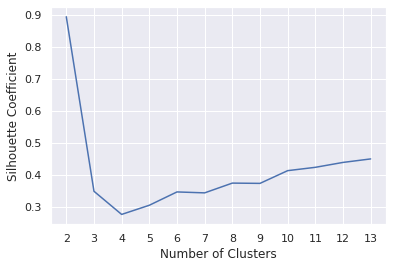

In [28]:
plt.plot(range(2,14), silhouette_coefficients)
plt.xticks(range(2,14))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [29]:
#attaching the labels to the original data
bb['cluster']=labels
bb.head()

,discount,overall rating,total rating,5star,4star,3star,2star,1star,reviews,review link,manufacturer info,importer info,packer info,text verified,target,cluster
0,1.62,5.0,6,6,0,0,0,0,2,1,0,0,0,0,1,0
1,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.22,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2.00,5.0,1,1,0,0,0,0,0,0,0,0,0,0,1,0
4,3.20,5.0,2,2,0,0,0,0,0,0,0,0,0,0,0,0


In [30]:
bb.cluster.value_counts().sort_index()


0    196
1      1
Name: cluster, dtype: int64

In [43]:
aggdata = bb.groupby('cluster').mean()


In [44]:
#aggreg#aggregating the clusters with the numeric variables with their mean
aggdata['Freq']=bb.cluster.value_counts().sort_index()
aggdata


,discount,overall rating,total rating,5star,4star,3star,2star,1star,reviews,review link,manufacturer info,importer info,packer info,text verified,target,Freq
cluster,,,,,,,,,,,,,,,,
0,35.791837,2.621429,271.326531,159.331633,53.821429,27.806122,11.989796,18.265306,6.321429,0.459184,0.790816,0.091837,0.326531,0.913265,0.234694,196
1,29.140000,4.000000,64768.000000,30441.000000,16192.000000,9068.000000,3886.000000,5181.000000,905.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1


In [45]:
#based on the above table renaming/ranking the playes in Grade A and Grade B
bb['cluster'] = bb['cluster'].replace({1: 'Grade A', 0: 'Grade B'})


In [46]:
#list of Grade A players
Grade_A = bb[bb['cluster'] == 'Grade A']
Grade_A.head(10)


,discount,overall rating,total rating,5star,4star,3star,2star,1star,reviews,review link,manufacturer info,importer info,packer info,text verified,target,cluster
113,29.14,4.0,64768,30441,16192,9068,3886,5181,905,1,1,0,1,1,0,Grade A


In [47]:
#list of Grade B players
Grade_B = bb[bb['cluster'] == 'Grade B']
Grade_B.head()

,discount,overall rating,total rating,5star,4star,3star,2star,1star,reviews,review link,manufacturer info,importer info,packer info,text verified,target,cluster
0,1.62,5.0,6,6,0,0,0,0,2,1,0,0,0,0,1,Grade B
1,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,Grade B
2,0.22,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,Grade B
3,2.00,5.0,1,1,0,0,0,0,0,0,0,0,0,0,1,Grade B
4,3.20,5.0,2,2,0,0,0,0,0,0,0,0,0,0,0,Grade B


In [48]:
Grade_B

,discount,overall rating,total rating,5star,4star,3star,2star,1star,reviews,review link,manufacturer info,importer info,packer info,text verified,target,cluster
0,1.62,5.0,6,6,0,0,0,0,2,1,0,0,0,0,1,Grade B
1,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,Grade B
2,0.22,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,Grade B
3,2.00,5.0,1,1,0,0,0,0,0,0,0,0,0,0,1,Grade B
4,3.20,5.0,2,2,0,0,0,0,0,0,0,0,0,0,0,Grade B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,0.00,5.0,2,2,0,0,0,0,2,1,1,0,1,1,0,Grade B
193,70.08,5.0,3,3,0,0,0,0,3,1,1,1,1,1,0,Grade B
194,64.31,3.0,1,0,0,1,0,0,0,0,1,0,1,1,0,Grade B
195,28.65,0.0,0,0,0,0,0,0,0,0,1,0,0,1,0,Grade B
